In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('sentiment.txt',sep='\t')

FileNotFoundError: [Errno 2] No such file or directory: 'sentiment.txt'

In [ ]:
df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [ ]:
df.tail()

,label,review
9995,pos,A revelation of life in small town America in ...
9996,pos,Great biography of a very interesting journali...
9997,neg,Interesting Subject; Poor Presentation: You'd ...
9998,neg,Don't buy: The box looked used and it is obvio...
9999,pos,Beautiful Pen and Fast Delivery.: The pen was ...


In [ ]:
df.shape

(10000, 2)

In [ ]:
df.columns

Index(['label', 'review'], dtype='object')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

label     0
review    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   10000 non-null  object
 1   review  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [ ]:
df.nunique()

label         2
review    10000
dtype: int64

In [ ]:
df['label'].unique()

array(['pos', 'neg'], dtype=object)

In [ ]:
df['label'].value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

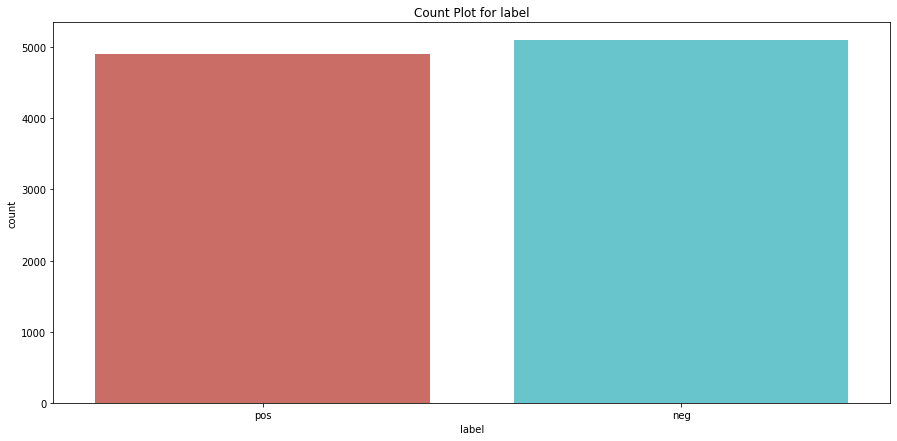

In [ ]:
plt.figure(figsize=[15,7],)
plt.title('Count Plot for label')
# color = ['red', 'blue']
sns.countplot(x = 'label', data = df, palette = 'hls')
plt.show()

In [ ]:
label_data = df['label'].value_counts()

explode = (0.1, 0.1)
plt.figure(figsize=(14, 10))
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors = ['blue', 'red'],
                               pctdistance = 0.65,
                               shadow = True,
                               startangle = 90,
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={ 'fontsize': 15,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='black')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Label', size=45, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

NameError: name 'df' is not defined

In [ ]:
#importing all the required libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import tokenize

In [ ]:
#converting the reviews into lower case
df.review=df.review.apply(lambda x: x.lower())

In [ ]:
df

,label,review
0,pos,stuning even for the non-gamer: this sound tra...
1,pos,the best soundtrack ever to anything.: i'm rea...
2,pos,amazing!: this soundtrack is my favorite music...
3,pos,excellent soundtrack: i truly like this soundt...
4,pos,"remember, pull your jaw off the floor after he..."
...,...,...
9995,pos,a revelation of life in small town america in ...
9996,pos,great biography of a very interesting journali...
9997,neg,interesting subject; poor presentation: you'd ...
9998,neg,don't buy: the box looked used and it is obvio...


In [ ]:
import contractions

In [ ]:
# Expanding contractions
def con(text):
    expand=contractions.fix(text)
    return expand

df.review=df.review.apply(con)
df['review'][0]

'stuning even for the non-gamer: this sound track was beautiful! it paints the senery in your mind so well i would recomend it even to people who hate vid. game music! i have played the game chrono cross but out of all of the games i have ever played it has the best music! it backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. it would impress anyone who cares to listen! ^_^'

In [ ]:
import re

def remove_sp(text):
    pattern=r'[^A-Za-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

df.review=df.review.apply(remove_sp)
df

,label,review
0,pos,stuning even for the nongamer this sound track...
1,pos,the best soundtrack ever to anything i am read...
2,pos,amazing this soundtrack is my favorite music o...
3,pos,excellent soundtrack i truly like this soundtr...
4,pos,remember pull your jaw off the floor after hea...
...,...,...
9995,pos,a revelation of life in small town america in ...
9996,pos,great biography of a very interesting journali...
9997,neg,interesting subject poor presentation you woul...
9998,neg,do not buy the box looked used and it is obvio...


In [ ]:
import string
punctuations=list(string.punctuation)

In [ ]:
# !"#$%&'()*+, -./:;<=>?@[\]^_`{|}~

In [ ]:
df.review=df.review.apply(lambda x : " ".join(x for x in x.split() if x not in punctuations))

In [ ]:
# Removing stopwords
nltk.download('stopwords')
stopword_list=stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp5cd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stopword_list.remove('no')
stopword_list.remove('not')

In [ ]:
df.review=df.review.apply(lambda x : " ".join(x for x in x.split() if x not in stopword_list))
df['review'][5]

'absolute masterpiece quite sure actually taking time read played game least heard least tracks whether aware not mitsudas music contributed greatly mood every single minute whole gamecomposed 3 cds quite songs not exact count heartrendering impressively remarkable soundtrack one assure not forget everything every listener fastpaced energetic dancing tokage termina home slower haunting dragon god purely beautifully composed times scar even fantastic vocals radical dreamersthis one best videogame soundtracks surely mitsudas best ever'

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp5cd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['review']=df.review.apply(word_tokenize)
df['review'][0]

['stuning',
 'even',
 'nongamer',
 'sound',
 'track',
 'beautiful',
 'paints',
 'senery',
 'mind',
 'well',
 'would',
 'recomend',
 'even',
 'people',
 'hate',
 'vid',
 'game',
 'music',
 'played',
 'game',
 'chrono',
 'cross',
 'games',
 'ever',
 'played',
 'best',
 'music',
 'backs',
 'away',
 'crude',
 'keyboarding',
 'takes',
 'fresher',
 'step',
 'grate',
 'guitars',
 'soulful',
 'orchestras',
 'would',
 'impress',
 'anyone',
 'cares',
 'listen']

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp5cd\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
lemmatizer=WordNetLemmatizer()

In [ ]:
df['review']=df.review.apply(lambda x:[lemmatizer.lemmatize(word) for word in x])

In [ ]:
df

,label,review
0,pos,"[stuning, even, nongamer, sound, track, beauti..."
1,pos,"[best, soundtrack, ever, anything, reading, lo..."
2,pos,"[amazing, soundtrack, favorite, music, time, h..."
3,pos,"[excellent, soundtrack, truly, like, soundtrac..."
4,pos,"[remember, pull, jaw, floor, hearing, played, ..."
...,...,...
9995,pos,"[revelation, life, small, town, america, early..."
9996,pos,"[great, biography, interesting, journalist, bi..."
9997,neg,"[interesting, subject, poor, presentation, wou..."
9998,neg,"[not, buy, box, looked, used, obviously, not, ..."


In [ ]:
df.review= df.review.astype(str)

In [ ]:
import numpy as np
review_list=df['review'].array
review_list.shape

(10000,)

In [ ]:
x = df.iloc[:,1].values
y = df.iloc[:,0].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [ ]:
print(x_train.shape)
x_test.shape

(7500,)


(2500,)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [ ]:
final = Pipeline([('Vect',TfidfVectorizer()),
                  ('model',SVC(probability=True))])

In [ ]:
final.fit(x_train,y_train)

Pipeline(steps=[('Vect', TfidfVectorizer()), ('model', SVC(probability=True))])

In [ ]:
y_pred=final.predict(x_test)
y_pred

array(['neg', 'pos', 'neg', ..., 'neg', 'neg', 'pos'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [ ]:
accuracy_score(y_pred,y_test)

0.8788

In [ ]:
confusion_matrix(y_pred,y_test)

array([[1103,  157],
       [ 146, 1094]], dtype=int64)

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         neg       0.88      0.88      0.88      1260
         pos       0.87      0.88      0.88      1240

    accuracy                           0.88      2500
   macro avg       0.88      0.88      0.88      2500
weighted avg       0.88      0.88      0.88      2500



In [ ]:
x_test[1]

"['one', 'greatest', 'book', 'ever', 'written', 'scarlet', 'letter', 'excellent', 'book', 'hawthorne', 'spends', 'much', 'time', 'discussing', 'character', 'thought', 'motif', 'end', 'book', 'understand', 'people', 'act', 'way', 'make', 'seem', 'almost', 'real', 'relates', 'nature', 'character', 'experiencing', 'make', 'story', 'even', 'powerful', 'one', 'place', 'told', 'rose', 'bush', 'grew', 'prison', 'seemed', 'nature', 'saying', 'even', 'though', 'people', 'abandoned', 'someone', 'could', 'always', 'count', 'nature', 'love', 'beautifully', 'written', 'story', 'adultery', 'jealous', 'spouse', 'happens', 'day', 'make', 'scarlet', 'letter', 'relate', 'reader', 'great', 'book', 'feel', 'one', 'best', 'ever', 'written']"

In [ ]:
final.predict([x_test[1]])

array(['pos'], dtype=object)

In [ ]:
x_test[7]

"['boring', 'not', 'waste', 'time', 'movie', 'boring', 'looking', 'forward', 'bash', 'america', 'flying', 'scene', 'look', 'fakelong', 'boring', 'love', 'story', 'end', 'character', 'not', 'finding', 'otherrent', 'buy', 'blue', 'max', 'much', 'better']"

In [ ]:
final.predict([x_test[7]])

array(['neg'], dtype=object)

In [ ]:
x_test[17]

"['another', 'nightmare', 'remove', 'cassette', 'message', 'camera', '18', 'month', '2', 'month', 'ago', 'started', 'beeping', 'eject', 'tape', 'almost', 'every', 'time', 'used', 'went', 'online', 'found', 'common', 'camera', 'reason', 'able', 'prevent', 'major', 'problem', 'removing', 'tape', 'use', 'no', 'longer', 'work', 'can', 'not', 'record', 'watch', 'tape', 'without', 'forcing', 'remove', 'cassette', 'fond', 'camera', 'stopped', 'working', 'disappointed', 'buy', 'new', 'camcorder', 'local', 'repairman', 'estimated', '200', 'fix', 'friend', 'exact', 'camera', 'yet', 'problem', 'not', 'worth', 'risk']"

In [ ]:
final.predict([x_test[17]])

array(['neg'], dtype=object)

In [ ]:
import pickle
pickle.dump(final,open('sentiment_analysis_model.p','wb'))

In [ ]:
import sklearn
sklearn_version = sklearn.__version__
print(sklearn_version)

1.1.2
